# Статистика, DS-поток
## Задание SP.3

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 60 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [ ]:
# Bot check

# HW_ID: ds_sp3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением (см. задание ST.3). Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя функцию из задания SP.2. Нужно нанести на график точки выборки.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

В задаче ST3.7b можно было доказать, что $n(X_{(n)}-\theta)\to-Exp(\frac{1}{\theta})$, и в итоге вывести границы интервала $\left(\frac{nX_{(n)}}{\ln(\frac{1-\alpha}{2}) + n}, \frac{nX_{(n)}}{\ln(\frac{1+\alpha}{2}) + n}\right)$

In [172]:
def draw_confidence_interval(  # функция из задания SP2
    left, right, estim=None, sample=None, ylim=(None,None), color_interval='#00CC66', color_sample='#0066FF', label_interval='', theta=None, estim_label=''
):
    '''Рисует доверительный интервал и оценку в зависимости от размера выборки'''
    time = np.arange(len(left)) + 1
    assert len(time) == len(right)
    if theta is not None:
        plt.hlines(theta, 1, len(right), color='#000000', label='Истинное значение $\\theta$', linestyle='--')
    if sample is not None:
        plt.scatter(time, sample, alpha=0.3, color=color_sample, s=40, label='Элемент выборки')
    if estim is not None:
        plt.plot(time, estim, color=color_sample, linewidth=2.5, label=estim_label)
    plt.fill_between(time, left, right, alpha=0.25, color=color_interval, label=label_interval)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Доверительные интервалы vs размер выборки')

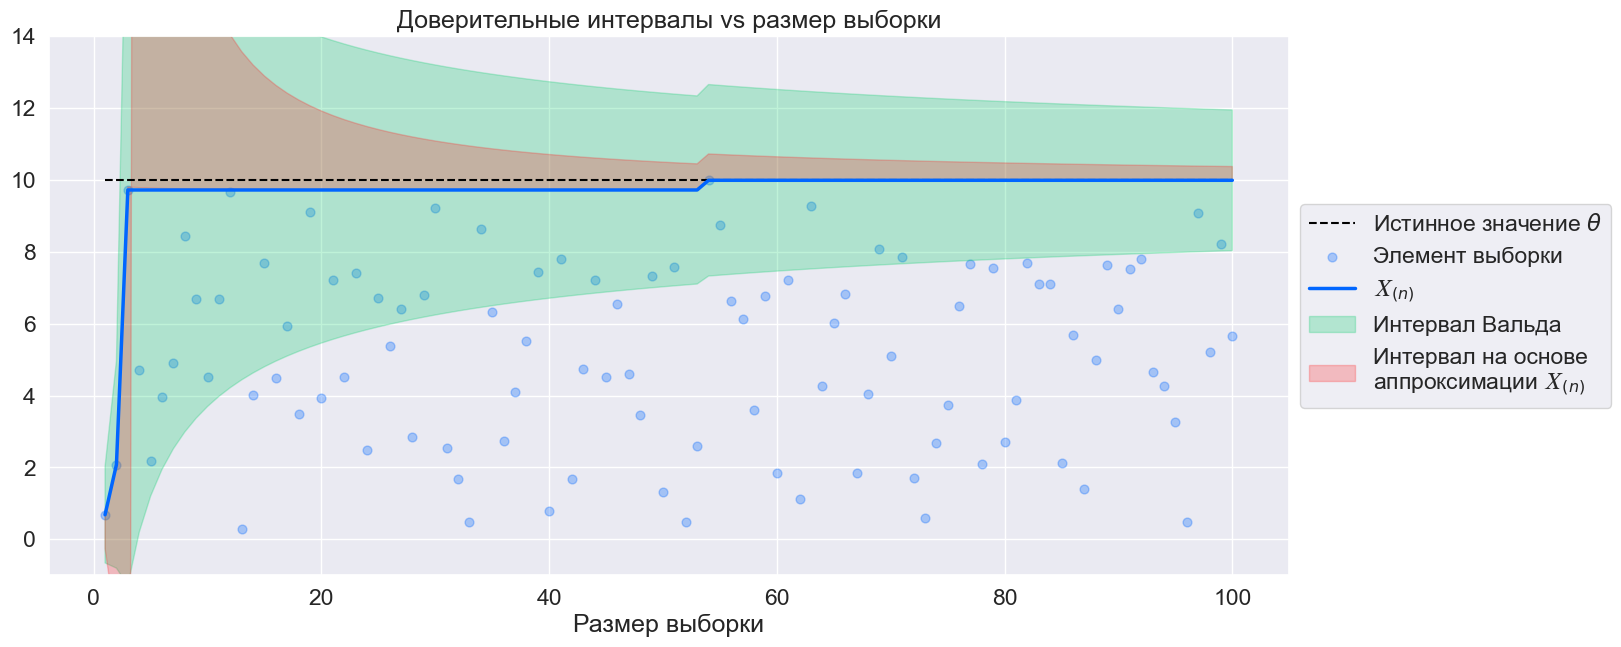

In [173]:
theta, N = 10, 100
sample = np.random.uniform(0, theta, N)  # генерируем и фиксируем выборку
L_wald, R_wald, L_appr, R_appr, estimations = [], [], [], [], []

def get_wald_confint(sample, axis=-1):
    '''Построение доверительного интервала Вальда (сразу для alpha=0.95)'''
    X_n = np.max(sample, axis=axis)
    n = len(sample)
    return X_n - 1.96 * (X_n / np.sqrt(n)), X_n + 1.96 * (X_n / np.sqrt(n))

def get_appr_confint(sample, axis=-1):
    '''Построение доверительного интервала на основе аппроксимации (сразу для alpha=0.95)'''
    X_n = np.max(sample, axis=axis)
    n = len(sample)
    return n*X_n / (np.log((1-0.95)/2) + n), n*X_n / (np.log((1+0.95)/2) + n)

for n in range(1, N+1):  # подвыборки размера n
    estimations.append(np.max(sample[:n]))
    L, R = get_wald_confint(sample[:n])
    L_wald.append(L)
    R_wald.append(R)
    L, R = get_appr_confint(sample[:n])
    L_appr.append(L)
    R_appr.append(R)

plt.figure(figsize=(16,7))
draw_confidence_interval(L_wald, R_wald, estimations, sample[:N], label_interval='Интервал Вальда', ylim=(-1,14), theta=theta, estim_label='$𝑋_{(n)}$')
draw_confidence_interval(L_appr, R_appr, color_interval='#FF2222', label_interval='Интервал на основе\nаппроксимации $𝑋_{(n)}$')
plt.show()

*Вальд: статистика по выборке достаточно большого размера приближенно имеет нормальное распределение.*  
*Аппроксимация $𝑋_{(n)}$: статистика по выборке достаточно большого размера приближенно имеет экспоненциальное распределение.*  
*По графику видно, что чем больше выборка, тем уже доверительный интервал для обоих методов. Однако, в методе Вальда доверительный интервал получается шире, особенно для небольших выборок. Аппроксимация $𝑋_{(n)}$ позволяет заметно сузить интервал, так как статистика $𝑋_{(n)}$ опирается на дополнительную информацию (максимум выборки).*  
*Кроме того, по графику можно отметить нюанс, что аппроксимация $𝑋_{(n)}$ плохо работает для чересчур малых размерах выборок (1,2,3)*

Сравните два исследуемых интервала по величине доли покрытия истинного значения $\theta$. Посмотрите примеры в ноутбуке с семинара.

  0%|          | 0/100 [00:00<?, ?it/s]

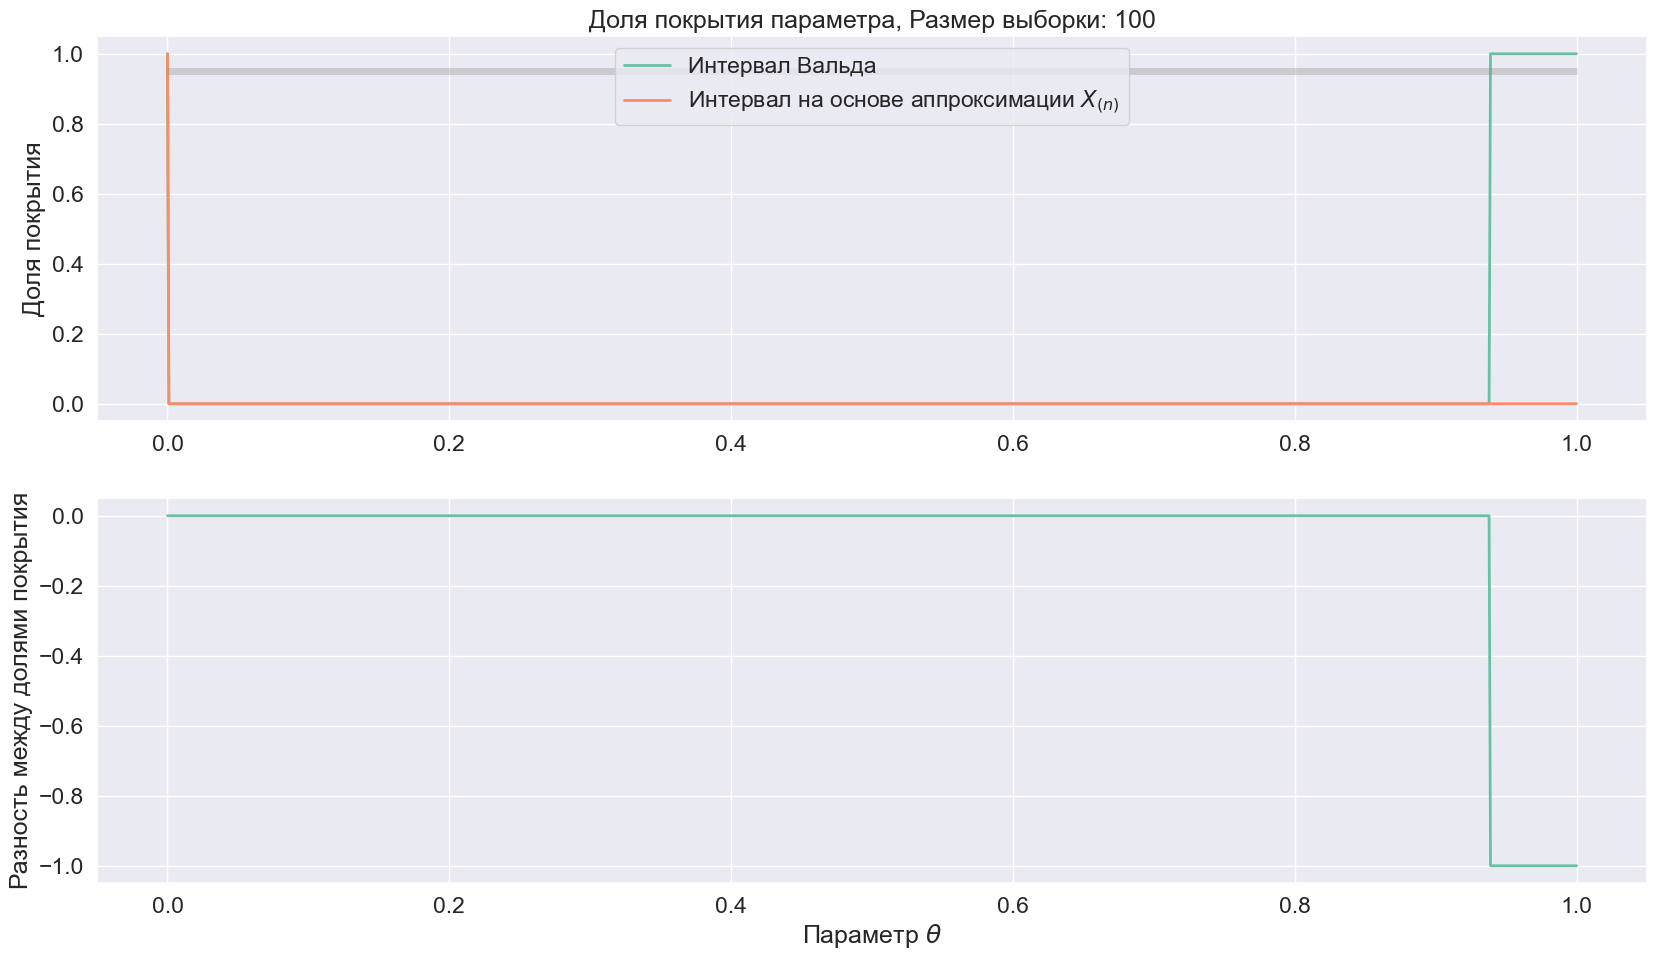

In [177]:
THETA_GRAN, SAMPLE_SIZE = 1000, 100  # размер сетки параметра, размер выборки

def get_coverage_rate(ci_builder, sample, theta_space):
    '''Вычисляет долю покрытия параметра доверительным интервалом'''
    left, right = ci_builder(sample, axis=-1)
    return np.mean((left <= theta_space.reshape(-1, 1)) & (theta_space.reshape(-1, 1) <= right), axis=-1)

def run_few_experiments(sample_size=100, num_exps=1000, theta_gran=100, methods=[get_wald_confint, get_appr_confint]):
    '''Запускает несколько экспериментов по определнию доли покрытия параметра доверительными интервалами из methods'''
    theta_space = np.linspace(0, 1, theta_gran)
    samples = sps.bernoulli(p=theta_space.reshape(-1, 1, 1)).rvs(size=(len(theta_space), num_exps, sample_size))
    return np.array([get_coverage_rate(method, samples, theta_space) for method in methods])  

def run_many_experiments(sample_size=100, num_exps=10_000, small_num_exps=100, theta_gran=1000, methods=[get_wald_confint, get_appr_confint]):
    '''Запускает много экспериментов по определению доли покрытия параметра дов. интервалами из methods'''
    results = np.zeros((2, theta_gran))
    launches = num_exps // small_num_exps
    for _ in tqdm(range(launches)):
        results += run_few_experiments(sample_size, small_num_exps, theta_gran, methods)
    return results / launches

def plot_results(results, names):
    '''Отрисовка графиков'''
    _, (ax1, ax2) = plt.subplots(figsize=(20, 11), nrows=2, ncols=1)
    for name, result in zip(names, results):
        theta_space = np.linspace(0, 1, THETA_GRAN)
        ax1.plot(theta_space, result, label=name, lw=2)
    ax1.hlines(0.95, 0, 1, color='gray', alpha=0.3, lw=5)
    ax1.legend()
    ax1.set_ylabel("Доля покрытия")
    # ax1.set_ylim(0.85, 1)
    ax1.set_title(f"Доля покрытия параметра, Размер выборки: {SAMPLE_SIZE}")
    ax2.plot(theta_space, results[1, :] - results[0, :], lw=2)
    # ax2.set_ylim(-0.1, 0.2)
    ax2.set_ylabel("Разность между долями покрытия")
    ax2.set_xlabel("Параметр $\\theta$")

results = run_many_experiments(SAMPLE_SIZE)
plot_results(results, ['Интервал Вальда', 'Интервал на основе аппроксимации $X_{(n)}$'])

***Вывод:***  
*По итогу задачи ясно, что с ростом размера выборки доверительный интервал сужается для обоих методов. Однако, в методе Вальда доверительный интервал получается шире, особенно для небольших выборок, т.к. в отличие от аппроксимации $𝑋_{(n)}$ метод Вальда не опирается на дополнительную информацию (максимум выборки)*

__________________
## Задача 2.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $(\overline{x}-\frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}S, \overline{x}+\frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}S)$

Точный доверительный интервал: $(\overline{x}-\frac{T_{n-1,\frac{1+\alpha}{2}}}{\sqrt{n-1}}S, \overline{x}+\frac{T_{n-1,\frac{1+\alpha}{2}}}{\sqrt{n-1}}S)$

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [178]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """Вычисляет асимптотический доверительный интервал для параметра сдвига в нормальной модели с неизвестной дисперсией
    :param sample: массив значений выборки (список или numpy массив
    :param alpha: ур-нь доверия
    :return: доверительный интервал
    """
    n = len(sample)
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    z = sps.norm.ppf((1+alpha)/2)
    frac = z * s / np.sqrt(n)
    return (x_bar - frac, x_bar + frac)


def calculate_confidence_intervals(sample, alpha=0.95):
    """Вычисляет точный доверительный интервал для параметра сдвига в нормальной модели с неизвестной дисперсией.
    :param sample: массив значений выборки (список или numpy массив)
    :param alpha: ур-нь доверия
    :return: доверительный интервал
    """
    n = len(sample)
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    t = sps.t.ppf((1+alpha)/2, n-1)
    frac = t * s / np.sqrt(n-1)
    return (x_bar - frac, x_bar + frac)

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

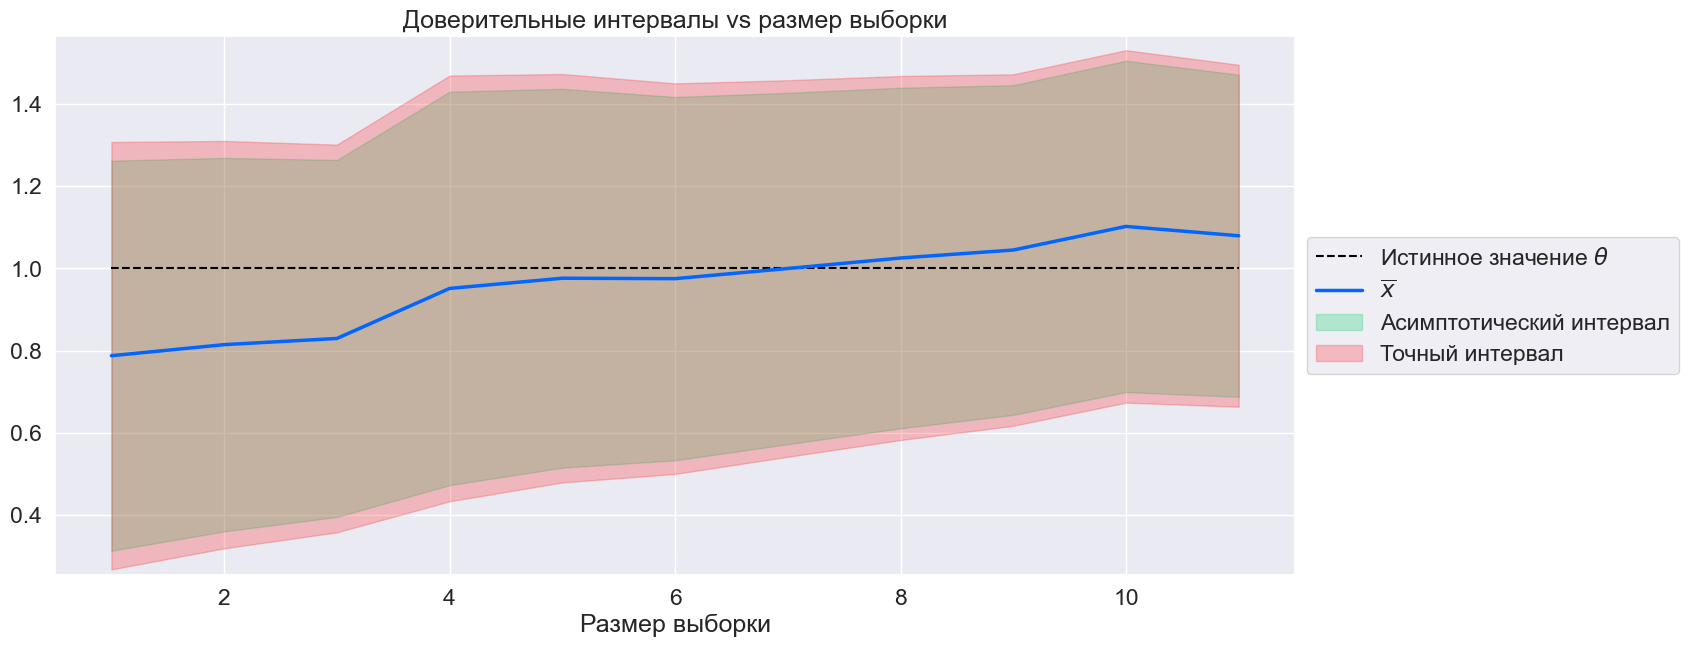

In [186]:
theta = 1
sample = np.random.normal(theta, 1, 30)
L_asym, R_asym, L_prec, R_prec, estimations = [], [], [], [], []

for n in range(20, 31):
    estimations.append(np.mean(sample[:n]))  # подвыборка размера n
    asymptotic_conf_int = calculate_asymptotic_confidence_intervals(sample[:n])
    precise_conf_int = calculate_confidence_intervals(sample[:n])
    L_asym.append(asymptotic_conf_int[0])
    R_asym.append(asymptotic_conf_int[1])
    L_prec.append(precise_conf_int[0])
    R_prec.append(precise_conf_int[1])

plt.figure(figsize=(16,7))
draw_confidence_interval(L_asym, R_asym, estimations, label_interval='Асимптотический интервал', theta=theta, estim_label='$\overline{x}$')
draw_confidence_interval(L_prec, R_prec, color_interval='#FF2222', label_interval='Точный интервал')
plt.show()

*Точный доверительный интервал всегда шире, чем асимптотический. Это объясняется тем, что асимптотический интервал характеризует поведение оценки в пределе - по сути, при бесконечно большой выборке, поэтому асимптотический интервал излишне оптимистичен*

Сравните также эти интервалы по величине доли покрытия истинного значения параметра сдвига.

In [ ]:
<...>

**Вывод:**   
*Точный доверительный интервал всегда шире, чем асимптотический. Это объясняется тем, что асимптотический интервал характеризует поведение оценки в пределе - по сути, при бесконечно большой выборке, поэтому асимптотический интервал излишне оптимистичен*

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце *(видимо, имелся в виду столбец таргетов)*

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [187]:
wine = fetch_ucirepo(id=109) 
df = pd.concat([wine.data.features, wine.data.targets], axis=1).rename(columns={'class':'target'})
features = ['Alcalinity_of_ash','Nonflavanoid_phenols','Proanthocyanins','Hue']
df = df[df.target==1][[*features,'target']] 
df.head(3)

,Alcalinity_of_ash,Nonflavanoid_phenols,Proanthocyanins,Hue,target
0,15.6,0.28,2.29,1.04,1
1,11.2,0.26,1.28,1.05,1
2,18.6,0.30,2.81,1.03,1


In [188]:
L_asym, R_asym, L_prec, R_prec, means = [], [], [], [], []

for feature in features:
    means.append(np.mean(df[feature]))
    asymptotic_conf_int = calculate_asymptotic_confidence_intervals(df[feature])
    precise_conf_int = calculate_confidence_intervals(df[feature])
    L_asym.append(asymptotic_conf_int[0])
    R_asym.append(asymptotic_conf_int[1])
    L_prec.append(precise_conf_int[0])
    R_prec.append(precise_conf_int[1])

stats = pd.DataFrame({'Признак':features, 'L (асимпт.)':L_asym, 'R (асимпт.)':R_asym, 'L (точный)':L_prec, 'R (точный)':R_prec, 'Среднее':means})
stats

,Признак,L (асимпт.),R (асимпт.),L (точный),R (точный),Среднее
0,Alcalinity_of_ash,16.387554,17.687022,16.368017,17.706559,17.037288
1,Nonflavanoid_phenols,0.272126,0.307874,0.271588,0.308412,0.290000
2,Proanthocyanins,1.794166,2.004478,1.791004,2.007640,1.899322
3,Hue,1.032312,1.091756,1.031418,1.092650,1.062034


***Вывод:***  
*На реальных данных подтвердилась та же закономерность: точный доверительный интервал всегда шире, чем асимптотический. Предполагаю, что на практике асимптотические интервалы используются редко, причем только при работе с гигантскими выборками*

__________________
## Задача 3. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

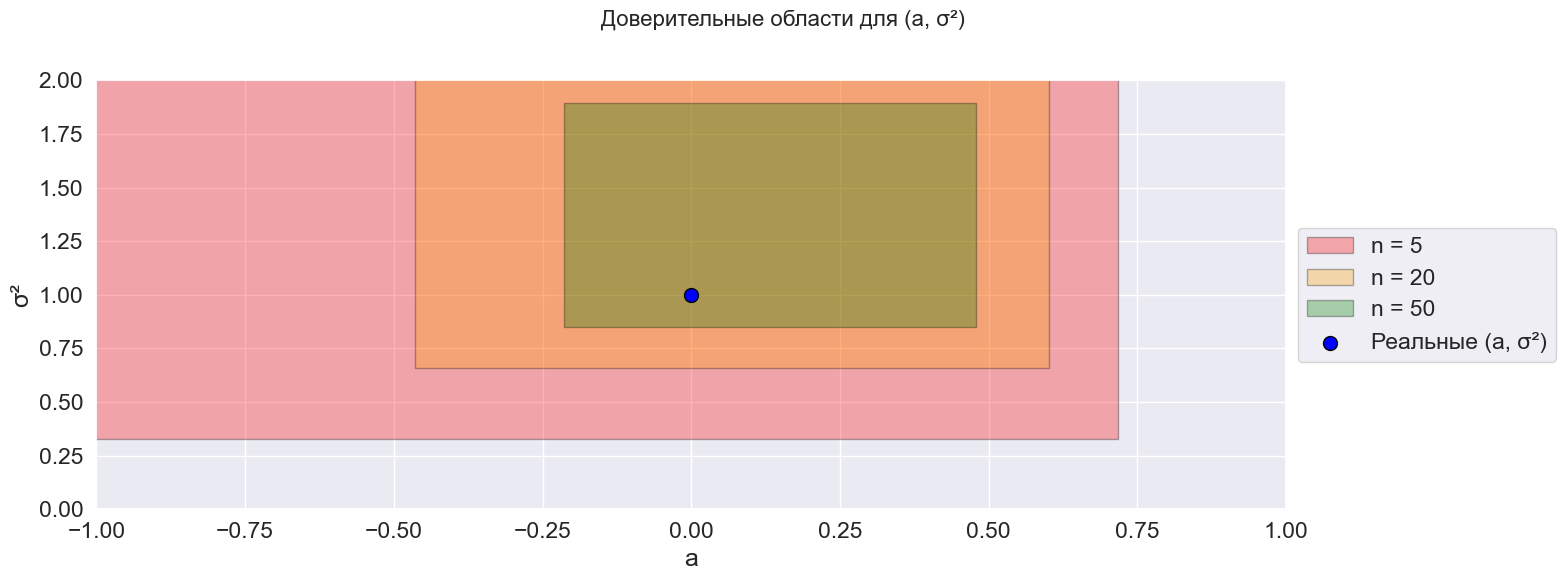

In [52]:
alpha, n_sizes, colors = 0.95, [5, 20, 50], ['red','orange','green']

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
fig.suptitle('Доверительные области для (a, σ²)', fontsize=16)
ax.set_xlabel('a')
ax.set_ylabel('σ²')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)

for i, (n, color) in enumerate(zip(n_sizes, colors)):
    sample = np.random.normal(0, 1, n)  # выборка
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    # дов. инт. для a
    frac = sps.t.ppf((1-alpha)/2, df=n-1) * sample_std**2 / np.sqrt(n)
    a,b = (sample_mean - frac, sample_mean + frac)
        
    # дов. инт. для σ²
    chi2_lower, chi2_upper = sps.chi2.ppf((1+alpha)/2, df=n-1), sps.chi2.ppf((1-alpha)/2, df=n-1)
    c,d = ((n-1) * sample_std**2 / chi2_upper, (n-1) * sample_std**2 / chi2_lower)
    
    rectangle = patches.Rectangle((a, c), b-a, d-c, facecolor=color, edgecolor='black', label=f'n = {n}', alpha=0.3)
    ax.add_patch(rectangle)
    
plt.scatter([0], [1], marker='o', color='blue', edgecolor='black', s=100, label='Реальные (a, σ²)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

*Видно, что доверительные области вложены друг в друга и покрывают истинное значение параметра. Логичная закономерность: с ростом размера выборки доверительная область сужается*

Исследуйте построенную доверительную область по величине доли покрытия параметра $\theta$.

***Вывод:***  
*Снова подтвердилась закономерность: с ростом размера выборки доверительная область сужается (даже если параметр многомерный)*